The dayNight image dataset consists of 80 RGB color images in two categories: day and night. There are equal numbers of each examples : 40 day images and 40 night images.
We'd like to build a classifier that can accurately label these images as day or night,and that relies on finding distinguishing features between the two types of images.

### Import Resources

In [1]:
import cv2
import helpers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Image data directories
img_dir_training='/content/gdrive/MyDrive/day_night_images/training'
img_dir_testing='/content/gdrive/MyDrive/day_night_images/testing'

### Load the datasets

In [4]:
IMG_LIST=helpers.load_dataset(img_dir_training)



### Construct a STANDARIZED_LIST of input images and output labels 

In [5]:
STANDARIZED_LIST=helpers.standardize(IMG_LIST)


### Visualize the STANDARIZED data

Shape:(600, 1100, 3)
Label [1 = day,0 = night]:1


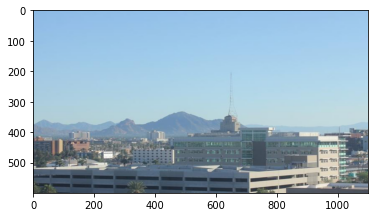

In [6]:
image_num=0
selected_image=STANDARIZED_LIST[image_num][0]
selected_label=STANDARIZED_LIST[image_num][1]

plt.imshow(selected_image)
print('Shape:'+ str(selected_image.shape))
print('Label [1 = day,0 = night]:'+str(selected_label))

## Feature Extraction
### RGB to HSV conversion

Labels:1


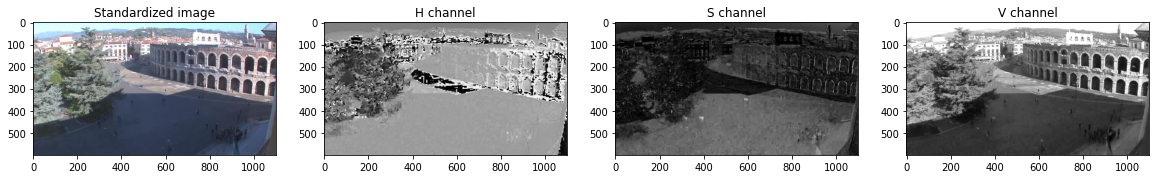

In [7]:
# RGB to HSV 
image_num=12
test_im=STANDARIZED_LIST[image_num][0]
test_label=STANDARIZED_LIST[image_num][1]

hsv=cv2.cvtColor(test_im,cv2.COLOR_RGB2HSV)

print('Labels:'+str(test_label))

h=hsv[:,:,0]
s=hsv[:,:,1]
v=hsv[:,:,2]

f,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)

ax2.set_title('H channel')
ax2.imshow(h,cmap='gray')

ax3.set_title('S channel')
ax3.imshow(s,cmap='gray')

ax4.set_title('V channel')
ax4.imshow(v,cmap='gray')

### Find the average brightness using V channnel

In [8]:
def avg_brightness(rgb_image):
  hsv=cv2.cvtColor(rgb_image,cv2.COLOR_RGB2HSV)
  sum_brightness=np.sum(hsv[:,:,2])
  area=600*1100.0
  avg=sum_brightness/area
  return avg

Avg brightness:93.83685757575758


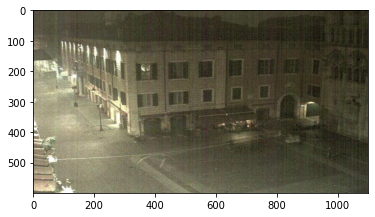

In [9]:
image_num=79
test_im=STANDARIZED_LIST[image_num][0]
avg=avg_brightness(test_im)
print('Avg brightness:' + str(avg))
plt.imshow(test_im)

## Classification

In [90]:
# Classifiaction

def estimate_label(rgb_image):
  avg=avg_brightness(rgb_image)
  predicted_label=0 #night
  threshold=100
  if (avg>threshold):
    predicted_label=1
  return predicted_label  

### Test Dataset

In [91]:
# Test dataset
import random
TEST_IMAGE_LIST=helpers.load_dataset(img_dir_testing)
STANDARIZED_TEST_LIST=helpers.standardize(TEST_IMAGE_LIST)
random.shuffle(STANDARIZED_TEST_LIST)

In [92]:
# construct the list of misclassification iamge
def get_misclassified_images(test_images):
  misclassification_images_labels=[]
  for image in test_images:
    im=image[0]
    true_label=image[1]
    predicted_label=estimate_label(im)
    if (predicted_label != true_label):
      misclassification_images_labels.append((im,predicted_label,true_label))
  return misclassification_images_labels    


In [95]:
# accuracy and number of misclassification
MISCLASSIFIED= get_misclassified_images(STANDARIZED_TEST_LIST)

total=len(STANDARIZED_TEST_LIST)
num_correct=total-len(MISCLASSIFIED)
accuracy=num_correct/total

print('Accuracy: '+str(accuracy))
print('Number of misclassifier images: ' + str(len(MISCLASSIFIED))+ ' out of '+ str(total))

Accuracy: 0.925
Number of misclassifier images: 6 out of 80


We can improve the accuracy by adding more number of features